## ANALISIS DE REGRESION MÙLTIPLE

###  Librerías a utilizar

In [1]:
## Tratamiento de datos
import numpy as np
import pandas as pd

## Preprocesado y modelado
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Gráficos
import matplotlib.pyplot as plt

### Base de datos

In [2]:
path_file = r'D:/OneDrive - Universidad Peruana de Ciencias/Documents/Carrera/2023-1/Fundamentos Data Science/Data-Science-Python/Reg_Lineal/'

In [4]:
df = pd.read_csv(path_file + 'Advertising_Sales.csv', delimiter= ',')
df.head(5)

,TV,Radio,Periodico,Web,Ventas
0,230.1,37.8,69.2,306.634752,22.1
1,44.5,39.3,45.1,302.653070,10.4
2,17.2,45.9,69.3,49.498908,9.3
3,151.5,41.3,58.5,257.816893,18.5
4,180.8,10.8,58.4,195.660076,12.9


In [5]:
# Estructura de los datos
df.dtypes

TV           float64
Radio        float64
Periodico    float64
Web          float64
Ventas       float64
dtype: object

In [6]:
# Cantidad de los datos
df.shape

(200, 5)

### Explorar los datos

In [7]:
# Anàlisis Descriptivo
df[['TV','Radio', 'Periodico', 'Web', 'Ventas', ]].describe()

,TV,Radio,Periodico,Web,Ventas
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


### Representación Gráfica

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


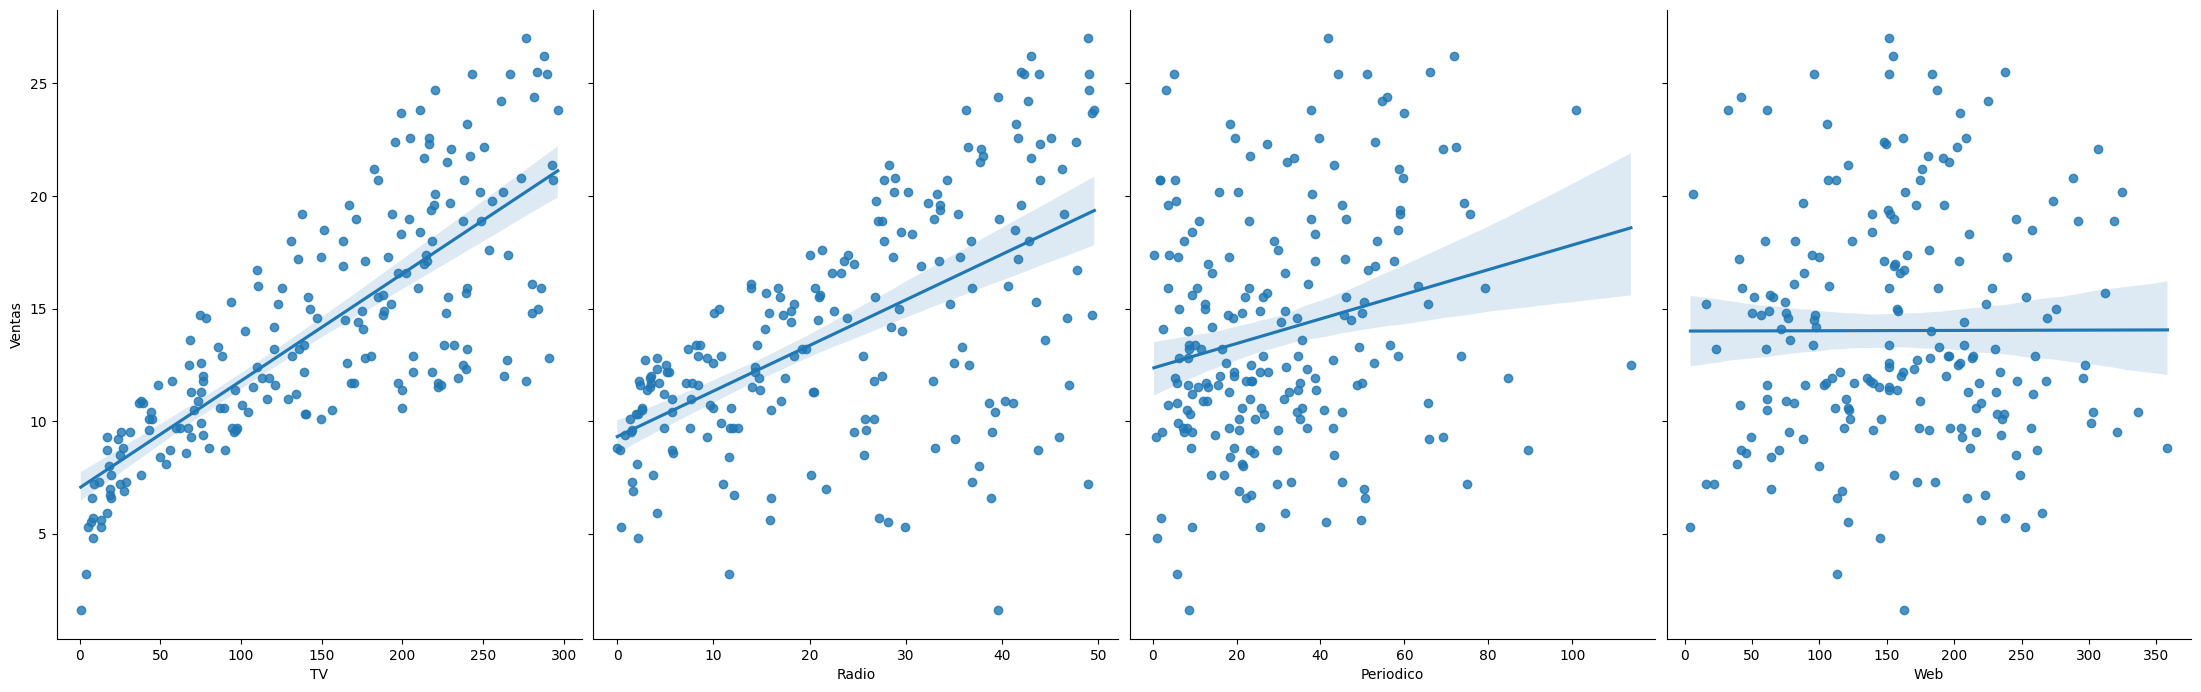

In [8]:
sns.pairplot(df, x_vars=['TV','Radio','Periodico', 'Web'], y_vars='Ventas', size=7, aspect=0.8,kind = 'reg')

Se observa la relación lineal entre las variables independientes con respecto a las ventas, con lo cual es posible estimar visualmente que la variable web y periodica tal vez tenga poco impacto en las ventas debido a la alta dispersión de los datos. Sin embargo participará en el modelo de regresión lineal múltiple.

### Anàlisis de Correlaciòn

<Axes: >

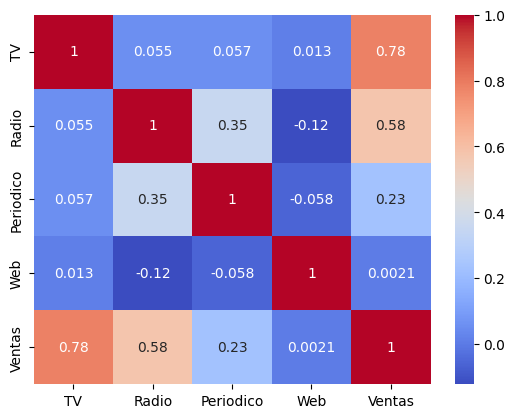

In [9]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

#### Definiciòn de Variables

Definición de variable independiente

In [13]:
X = df.iloc[:, 0:4]
X

,TV,Radio,Periodico,Web
0,230.1,37.8,69.2,306.634752
1,44.5,39.3,45.1,302.653070
2,17.2,45.9,69.3,49.498908
3,151.5,41.3,58.5,257.816893
4,180.8,10.8,58.4,195.660076
...,...,...,...,...
195,38.2,3.7,13.8,248.841073
196,94.2,4.9,8.1,118.041856
197,177.0,9.3,6.4,213.274671
198,283.6,42.0,66.2,237.498063


Definición de variable dependiente

In [14]:
Y = df.iloc[:, 4]
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Ventas, Length: 200, dtype: float64

## Modelado

In [15]:
# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1280)

In [16]:
X_train.shape

(160, 4)

In [17]:
print(X_train)

        TV  Radio  Periodico         Web
161   85.7   35.8       49.3  188.933530
62   239.3   15.5       27.3  312.209555
164  117.2   14.7        5.4  109.008763
74   213.4   24.6       13.1  156.284261
113  209.6   20.6       10.7   42.883796
..     ...    ...        ...         ...
173  168.4    7.1       12.8  218.180829
49    66.9   11.7       36.8  205.253501
178  276.7    2.3       23.7  137.323772
3    151.5   41.3       58.5  257.816893
189   18.7   12.1       23.4  222.906951

[160 rows x 4 columns]


In [18]:
X_test.shape

(40, 4)

In [19]:
print(X_train[['TV']], X_train[['Radio']], X_train[['Periodico']], X_train[['Web']])

        TV
161   85.7
62   239.3
164  117.2
74   213.4
113  209.6
..     ...
173  168.4
49    66.9
178  276.7
3    151.5
189   18.7

[160 rows x 1 columns]      Radio
161   35.8
62    15.5
164   14.7
74    24.6
113   20.6
..     ...
173    7.1
49    11.7
178    2.3
3     41.3
189   12.1

[160 rows x 1 columns]      Periodico
161       49.3
62        27.3
164        5.4
74        13.1
113       10.7
..         ...
173       12.8
49        36.8
178       23.7
3         58.5
189       23.4

[160 rows x 1 columns]             Web
161  188.933530
62   312.209555
164  109.008763
74   156.284261
113   42.883796
..          ...
173  218.180829
49   205.253501
178  137.323772
3    257.816893
189  222.906951

[160 rows x 1 columns]


In [20]:
y_train.shape

(160,)

In [21]:
y_test.shape

(40,)

#### Modelo de Regresiòn Lineal Mùltiple

In [22]:
#Definimos el algoritmo a utilizar
modelo_rm = LinearRegression()

In [23]:
#Entrenamos el modelo
modelo_rm.fit(X_train,y_train)

LinearRegression()

#### Estimadores de los Coeficientes

In [24]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
# Pendiente
print("Pendiente: ",modelo_rm.coef_)
# Interceptor
print("Interceptor: ",modelo_rm.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Pendiente:  [0.04541231 0.18730305 0.00246068 0.00377076]
Interceptor:  2.267576022579515


#### Predicciòn del Modelo

In [26]:
#Realizamos una predicción
Y_pred = modelo_rm.predict(X_test)
Y_pred

array([ 9.48717163, 12.29298557, 18.73844755, 17.90801545, 22.96748613,
       13.13360268, 11.65362902, 22.75855616, 10.41641382, 14.55551139,
       21.09900012,  8.07142156, 12.01081611, 13.88134847, 20.76409762,
       17.26850075, 19.28143248, 19.32571843, 19.25430319, 21.45216865,
        7.55094813, 23.00520415, 15.01310737, 20.02154855,  4.89372585,
        9.47575724, 17.12434036, 12.08956296, 20.85488718,  6.11958063,
       14.06482121, 15.0841398 , 13.38248466, 12.57985451, 19.94523571,
       16.91351491,  8.10503827, 23.17182757, 21.43383192, 13.24644151])

In [27]:
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(Ventas=y_test)
df_pred = df_pred.assign(Pred = Y_pred.flatten().tolist())
df_pred.head(10)

,TV,Radio,Periodico,Web,Ventas,Pred
79,116.0,7.7,23.1,120.053504,11.0,9.487172
7,120.2,19.6,11.6,229.971459,13.2,12.292986
14,204.1,32.9,46.0,245.774960,19.0,18.738448
59,210.7,29.5,9.3,138.895554,18.4,17.908015
36,266.9,43.8,5.0,96.316829,25.4,22.967486
115,75.1,35.0,52.7,204.276714,12.6,13.133603
86,76.3,27.5,16.0,193.830894,12.0,11.653629
17,281.4,39.6,55.8,41.755313,24.4,22.758556
12,23.8,35.1,65.9,87.921085,9.2,10.416414
110,225.8,8.2,56.5,95.185762,13.4,14.555511


In [28]:
df_pred.shape

(40, 6)

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


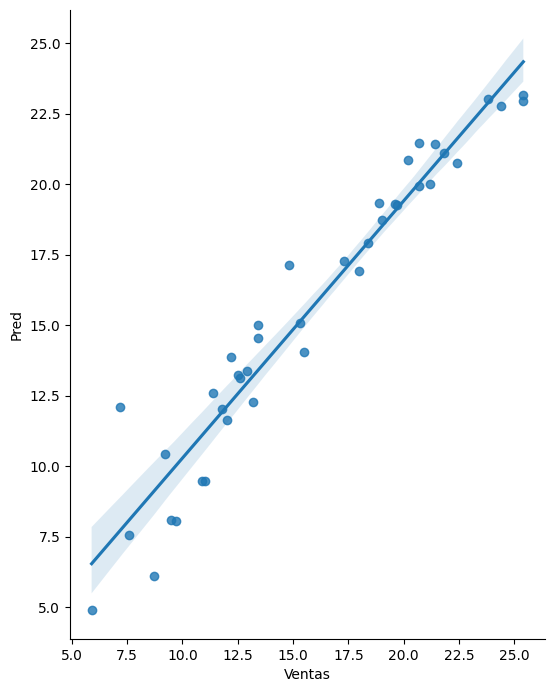

In [29]:
sns.pairplot(df_pred, x_vars=['Ventas'], y_vars='Pred', size=7, aspect=0.8,kind = 'reg')

Comparando los datos de la predicciòn con los datos reales, se observa no que hay diferencia considerable entre si, por lo tanto este modelo es adecuado implementar para este conjunto de datos.

#### Evaluaciòn del Modelo

In [30]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(y_test,Y_pred))

Mean Squared Error: MSE 2.050157457651904


In [31]:
# Precisiòn del Modelo
print("Precisión del Modelo: ",metrics.r2_score(y_test,Y_pred))

Precisión del Modelo:  0.9294214307362619


La precisiòn es buena, ya que este valor està cercano a la unidad.